# Problem 1:


In [1]:
# Not allowed to use any sampling libraries/functions. 
# But you are allowed to use rand() call to generate a pseudo-uniform value in [0,1]
# can also use a library to compute pdf(x|params). 

import math
import random
import numpy as np

# from scipy.stats import pdf
# from scipy.stats import multivariate_normal as mvn

In [2]:
# A. Implement Simple Sampling from continuous distributions:
    # uniform (min, max, sample_size)
    # gaussian (mu, sigma, sample_size)

def uniform(min_val, max_val, sample_size):
    samples = []
    for _ in range(sample_size):
        sample = min_val + (max_val - min_val) * random.random()
        samples.append(sample)
    return samples

def gaussian(mu, sigma, sample_size):
    samples = []
    for _ in range(sample_size):
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        sample = mu + sigma * z0
        samples.append(sample)
    return samples


uniform_distr_samples = uniform(0, 1, 10000)
gaussian_distr_samples = gaussian(0, 1, 10000)

Text(0, 0.5, 'Frequency')

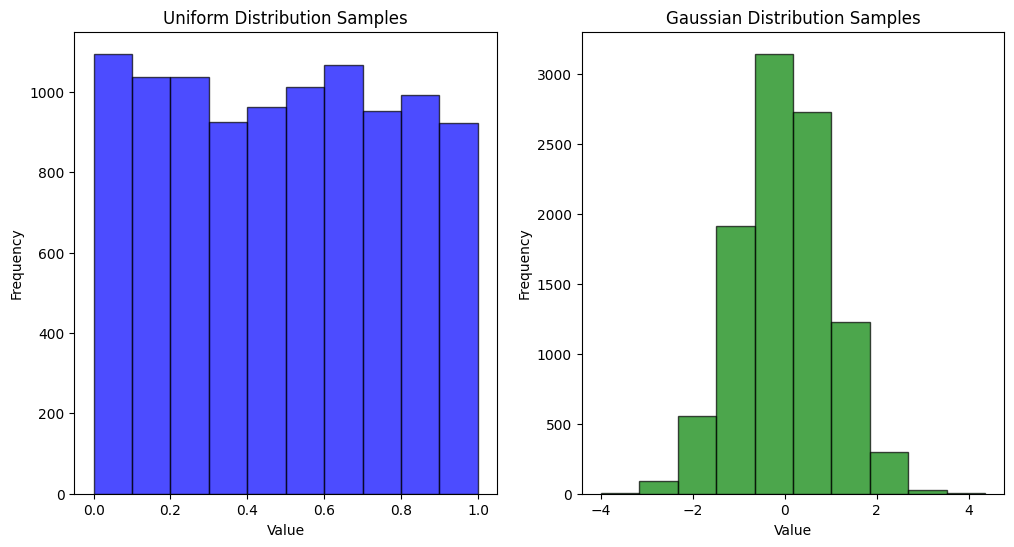

In [3]:
# plot them:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(uniform_distr_samples, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(gaussian_distr_samples, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Gaussian Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')


100%|██████████| 100000/100000 [00:13<00:00, 7485.53it/s]


Generated samples: [[-0.23952095 -0.7161422 ]
 [ 2.98017915  1.88254999]
 [ 1.50724863  2.1157722 ]
 ...
 [ 1.56981085  2.26987502]
 [ 1.41674528 -0.29066551]
 [-1.32628069  2.88287092]]
Number of accepted samples: 35368
Acceptance rate: 0.35368


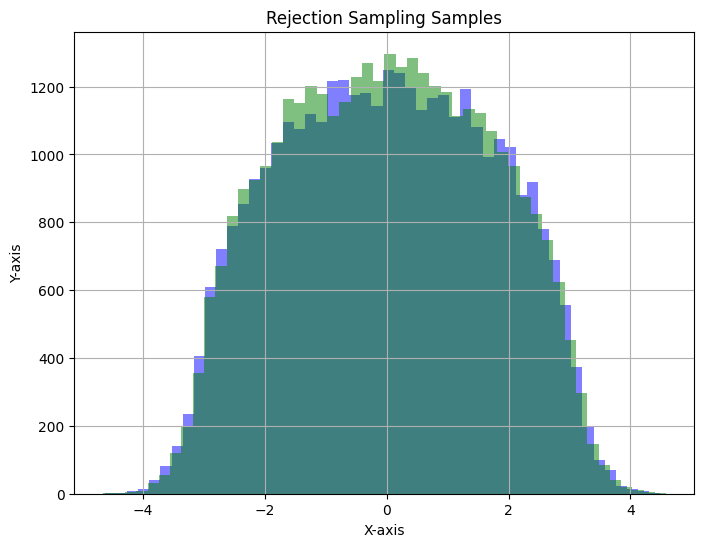

In [22]:
# Rejection Sampling from continuous distributions:
from scipy.stats import norm
from tqdm import tqdm
# B. Implement Rejection Sampling from continuous distributions:
    # 1.  random mu and sigma -> multivariate list of mu 1x2 and sigma 2x2
    # 2.  start with random discrete distribution (uniform) prior (A,B) -> lower bound, upper bound
        # A1 B1, A2,B2 where unif_1, unif_2 1x2 arrays
    # 3. how many samples to generate
    # 4. multivariate gaussian pdf(x|mu,sigma) -> max f(x)
        # begin loop for each sample
        # generate random sample from (unif_1, unif_2)
        # compute f(x) multivariate guassian pdf(x|mu,sigma)
        # compute g(x) is generator sample
        # acceptance ratio = f(x)/max(f(x) * g(x)
        # generate np.rand.rand() in [0,1] and compare with acceptance ratio
        # z if > or <= accept/reject
        # if accept, add to samples list


def rejection_sampling(mu, sigma, unif_1, unif_2, num_samples):
    samples = []
    max_pdf = norm.pdf(0, mu[0], sigma[0, 0]) * norm.pdf(0, mu[1], sigma[1, 1])
    
    for _ in tqdm(range(num_samples)):
        # Generate a random sample from the uniform distribution
        x = np.array([random.uniform(unif_1[0], unif_1[1]), random.uniform(unif_2[0], unif_2[1])])
        
        # Compute the PDF of the multivariate Gaussian at x
        pdf_x = norm.pdf(x[0], mu[0], sigma[0, 0]) * norm.pdf(x[1], mu[1], sigma[1, 1])
        
        # Compute the PDF of the generator (uniform distribution)
        g_x = 1 / ((unif_1[1] - unif_1[0]) * (unif_2[1] - unif_2[0]))
        
        # Compute the acceptance ratio
        acceptance_ratio = pdf_x / (max_pdf * g_x)
        
        # Generate a random number in [0, 1]
        z = random.random()
        
        # Accept or reject the sample
        if z <= acceptance_ratio:
            samples.append(x)
    
    return np.array(samples)

# Example parameters
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])  # Identity covariance matrix
unif_1 = np.array([-5, 5])
unif_2 = np.array([-5, 5])
num_samples = 100000

samples = rejection_sampling(mu, sigma, unif_1, unif_2, num_samples)
print("Generated samples:", samples)
print("Number of accepted samples:", len(samples))
print("Acceptance rate:", len(samples) / num_samples)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.hist(samples[:, 0], bins=50, alpha=0.5, label='X-axis', color='blue')
plt.hist(samples[:, 1], bins=50, alpha=0.5, label='Y-axis', color='green')
plt.title('Rejection Sampling Samples')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

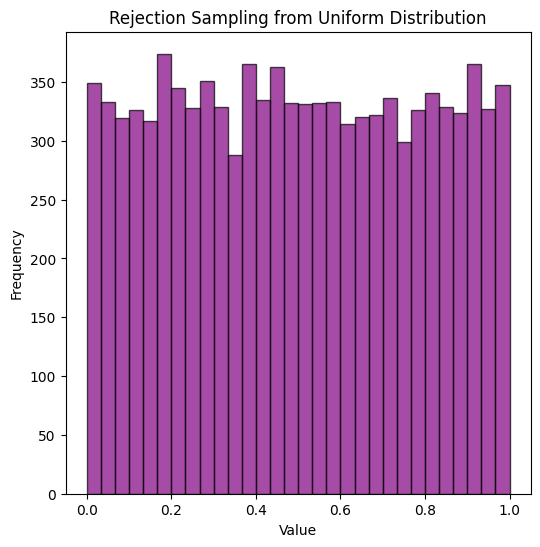

In [5]:
# From uniform distribution using rejection sampling
def uniform_pdf(x, min_val=0, max_val=1):
    if min_val <= x <= max_val:
        return 1 / (max_val - min_val)
    return 0

rejection_uniform_samples = rejection_sampling(uniform_pdf, 10000, (0, 1))
plt.figure(figsize=(6, 6))
plt.hist(rejection_uniform_samples, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Rejection Sampling from Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [7]:
# C. Implement without-replacement sampling from a discrete non-uniform distribution (given as input) following the Steven's method described in class ( paper ). 
    # Test it on desired sample sizes N significantly smaller than population size M (for example N=20 M=300)

Population:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 14, 14, 14, 14, 16, 16, 16, 17, 17, 18, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 26, 27, 27, 27, 27, 27, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 32, 33, 33, 33, 34, 34, 35, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 42, 45, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 53, 54, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 6

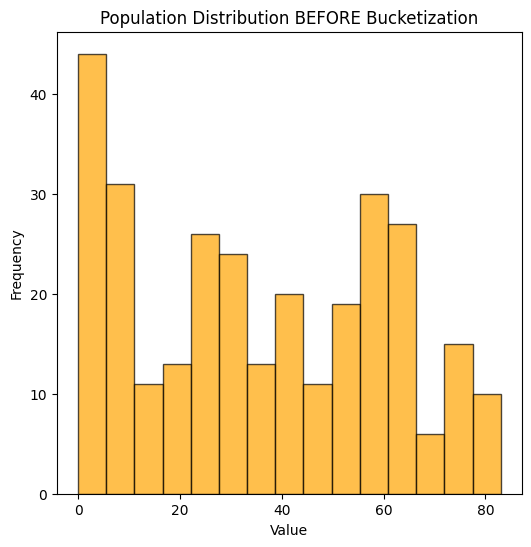

Population:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 14, 14, 14, 14, 16, 16, 16, 17, 17, 18, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 26, 27, 27, 27, 27, 27, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 32, 33, 33, 33, 34, 34, 35, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 42, 45, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 53, 54, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 6

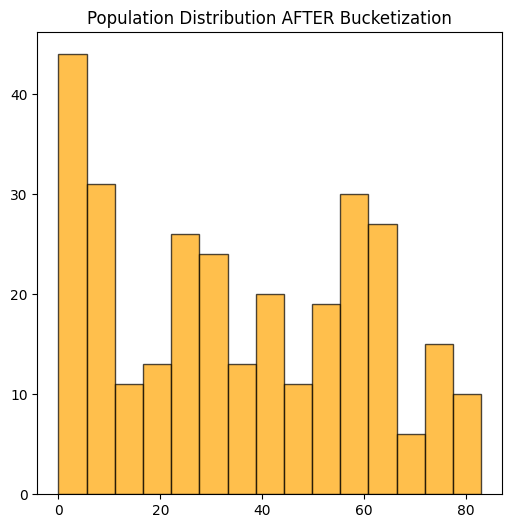

In [51]:
# Stevens method:

# 1. Bucketize into K buckets where within each bucket
def bucketize(population, K):
    
    bucket_length = len(population) // K # 15
    # 0-14
    # 15-29
    # ...
    # 70-84
    buckets = []
    for i in range(K):
        start = i * bucket_length
        end = (i + 1) * bucket_length if i < K - 1 else len(population)
        buckets.append(population[start:end])
    return buckets


# Uniformly distribute within the buckets
def stevens_sampling(population, sample_size):
    print("Population: ", sorted(population))
    K = max(1, len(population) // sample_size)
    buckets = bucketize(sorted(population), K)
    print(len(buckets), buckets)
    

    # show a histogram of the buckets
    plt.figure(figsize=(6, 6))
    plt.hist(population, bins=len(population)//20, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Population Distribution AFTER Bucketization')

    samples = []
    
    for bucket in buckets:
        if len(samples) >= sample_size:
            break
        if bucket:
            samples.append(random.choice(bucket))
    
    # If we still don't have enough samples, randomly sample from the population
    while len(samples) < sample_size:
        samples.append(random.choice(population))
    
    return samples[:sample_size]


# first, generate a population of size M=300 with non-uniform distribution
sample_size = 20
population = np.random.choice(range(84), size=300, p=np.random.dirichlet(np.ones(84))) # M = size = 300
print("Population: ", sorted(population))

# plot:
plt.figure(figsize=(6, 6))
plt.hist(population, bins=len(population)//20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Population Distribution BEFORE Bucketization')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# sample size N=20

samples = stevens_sampling(population, sample_size)

